<a href="https://colab.research.google.com/github/AryanRastogi7767/Practice-Projects/blob/master/Census_Income_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Census Income Prediction

### Dataset - Census Income Data from UCI Machine Learning Repository

### Task -  Predict whether income exceeds 50K/yr based on census data.

**Data Set Information:**

Extraction was done by Barry Becker from the 1994 Census database. A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0).

### Attribute information:

Listing of attributes:

* **salary:** >50K, <=50K.
* **age**: continuous.
* **workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* **fnlwgt:** continuous.
* **education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-                  4th, 10th, Doctorate, 5th-6th, Preschool.
* **education-num:** continuous.
* **marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-                             spouse.
* **occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners,                            Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-                    Forces.
* **relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* **sex:** Female, Male.
* **capital-gain:** continuous.
* **capital-loss:** continuous.
* **hours-per-week:** continuous.
* **native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan,                       Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico,                               Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary,                                 Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-                         Netherlands.

## More info on the Data

**Number of Instances**
* 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
* 45222 if instances with unknown values are removed (train=30162, test=15060)
* Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).

**Number of Attributes** 
* 6 continuous, 8 nominal attributes.

**Missing Attribute Values:** 
* 7% have missing values.

**Class Distribution:** 
* Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
* Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)

**Description of fnlwgt (final weight)**

The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US.  These are prepared monthly for us by Population Division here at the Census Bureau.  We use 3 sets of controls.
These are:
   * A single cell estimate of the population 16+ for each state.
   * Controls for Hispanic Origin by age and sex.
   * Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used.

The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population.

People with similar demographic characteristics should have similar weights.  There is one important caveat to remember about this statement.  That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,confusion_matrix
from datetime import datetime
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving adult.data to adult.data
Saving adult.names to adult.names
Saving adult.test to adult.test
Saving old.adult.names to old.adult.names


### Importing Training and test data into Dataframes.

In [5]:
import io
train = pd.read_csv(io.BytesIO(uploaded['adult.data']),names =['age','work_class','final_weight','education','education_num','marital_status',\
                                         'occupation','relationship','race','sex','capital_gain','capital_loss',\
                                         'hours_per_week','native_country','salary'])
print(train.shape)
train.head()

(32561, 15)


,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [6]:
test = pd.read_csv(io.BytesIO(uploaded['adult.test']),names =['age','work_class','final_weight','education','education_num','marital_status',\
                                         'occupation','relationship','race','sex','capital_gain','capital_loss',\
                                         'hours_per_week','native_country','salary'])
test = test.iloc[1:,]
test.reset_index(inplace=True)
test.drop(labels = ['index'],axis =1,inplace = True)
test .head()

,age,work_class,final_weight,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
1,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
2,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
3,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
4,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   work_class      32561 non-null  object
 2   final_weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**The train data has no null values.**

In [8]:
train.describe()

,age,final_weight,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## EDA and Feature Enggineering

**Checking if the data is balanced or imbalanced.**

In [9]:
print("Individuals with salary <= 50k: ",train['salary'].value_counts()[0])
print("Individuals with salary >50k: ",train['salary'].value_counts()[1])

Individuals with salary <= 50k:  24720
Individuals with salary >50k:  7841


**This shows that our data is imbalanced.**

**Label encoding the features.**

In [10]:
def encoder(data):
    start = datetime.now()
    result = data.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    print('Time taken to run encoder function: ',datetime.now()-start)        
    return result        

In [11]:
encoded = encoder(train)

Time taken to run encoder function:  0:00:00.074712


**Checking correlation between features.**

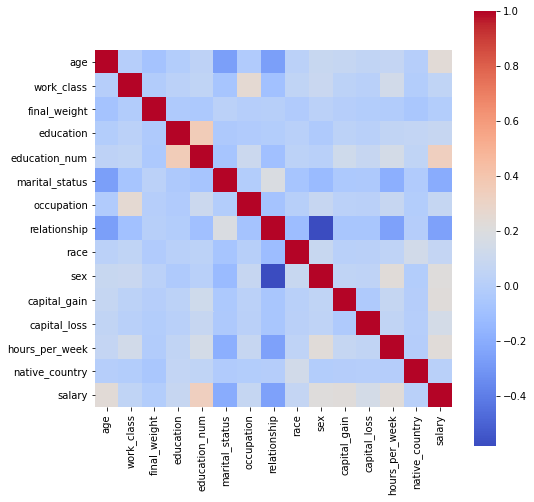

In [12]:
fig = plt.figure(figsize = (8,8))
sns.heatmap(encoded.corr(),cmap = 'coolwarm',square = True)

**From the above plot we can observe that columns 'education','education_num' are highly correlated and 'Sex' and 'Relationship' are negatively correlated.**

In [13]:
train[['education','education_num']].head()

,education,education_num
0,Bachelors,13
1,Bachelors,13
2,HS-grad,9
3,11th,7
4,Bachelors,13


**We can see that the 'education_num' column is the encoded form of the 'education' column. Higher the education_num value higher is the education of the individual.**

**The education column is encoded as follows:**

In [14]:
d = {}
for i in range(train.shape[0]):              
    for j in train['education'].unique():
        if(train['education'][i]==j):
            d.update({j:train['education_num'][i]})
            break

d

{' 10th': 6,
 ' 11th': 7,
 ' 12th': 8,
 ' 1st-4th': 2,
 ' 5th-6th': 3,
 ' 7th-8th': 4,
 ' 9th': 5,
 ' Assoc-acdm': 12,
 ' Assoc-voc': 11,
 ' Bachelors': 13,
 ' Doctorate': 16,
 ' HS-grad': 9,
 ' Masters': 14,
 ' Preschool': 1,
 ' Prof-school': 15,
 ' Some-college': 10}

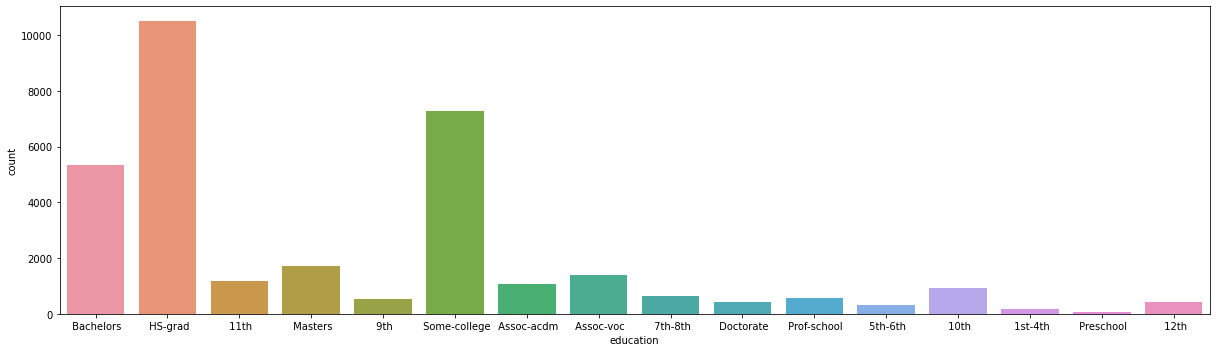

In [15]:
fig = plt.figure(figsize=(17,5))
sns.countplot(train['education'])
plt.tight_layout()

**As both the 'education' and 'education_num' column give the same information therefore dropping the 'education' column as strings are no use to us.**

In [16]:
train.drop('education',axis=1,inplace = True)

In [17]:
train.head()

,age,work_class,final_weight,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Analysis of Age column

In [18]:
train['age'].describe()

count    32561.000000
mean        38.581647
std         13.640433
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

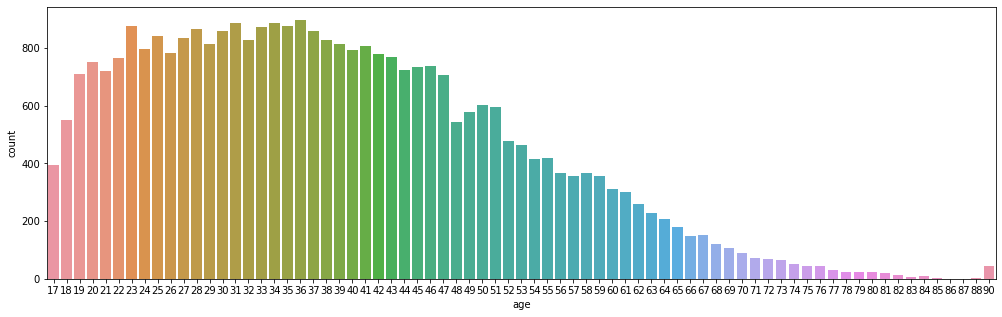

In [19]:
fig = plt.figure(figsize=(17,5))
sns.countplot(train['age'])

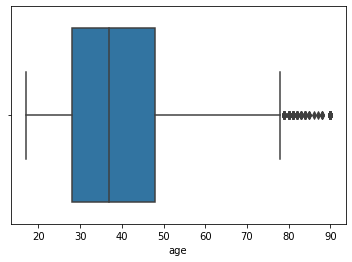

In [20]:
sns.boxplot(train['age'])

**We can see that most of data consists of individuals in the age group of 30-50.**

**75% of the people in the data have age less than or equal to 48.**

**We can convert the age column from continuous to categorical which can help us in furthur analysis of the column.**

In [21]:
# CONVERTING 'age' TO CATEGORICAL
data = [train]
for dataset in data:
    dataset['age'] = dataset['age'].astype(int)
    dataset.loc[ dataset['age'] <= 11, 'age'] = 0
    dataset.loc[(dataset['age'] > 11) & (dataset['age'] <= 18), 'age'] = 1
    dataset.loc[(dataset['age'] > 18) & (dataset['age'] <= 22), 'age'] = 2
    dataset.loc[(dataset['age'] > 22) & (dataset['age'] <= 27), 'age'] = 3
    dataset.loc[(dataset['age'] > 27) & (dataset['age'] <= 33), 'age'] = 4
    dataset.loc[(dataset['age'] > 33) & (dataset['age'] <= 45), 'age'] = 5
    dataset.loc[(dataset['age'] > 45) & (dataset['age'] <= 66), 'age'] = 6
    dataset.loc[ dataset['age'] > 66, 'age'] = 7
    
    dataset['age'] = dataset['age'].astype(str)
    dataset.loc[ dataset['age'] == '0', 'age'] = "Children"
    dataset.loc[ dataset['age'] == '1', 'age'] = "Teens"
    dataset.loc[ dataset['age'] == '2', 'age'] = "Youngsters"
    dataset.loc[ dataset['age'] == '3', 'age'] = "Young Adults"
    dataset.loc[ dataset['age'] == '4', 'age'] = "Adults"
    dataset.loc[ dataset['age'] == '5', 'age'] = "Middle Age"
    dataset.loc[ dataset['age'] == '6', 'age'] = "Senior"
    dataset.loc[ dataset['age'] == '7', 'age'] = "Very Senior"

In [22]:
train.head(3)

,age,work_class,final_weight,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,Middle Age,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Senior,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Middle Age,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


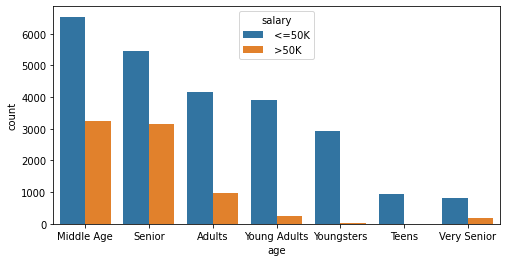

In [23]:
fig = plt.figure(figsize=(8,4))
sns.countplot(train['age'],hue = train['salary'])

**We can see that maximum number of people with salary greater than 50k are Middle Aged or Senior i.e. their age lies between 33-66.**

### Analysis of the Work Class column

In [24]:
train['work_class'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: work_class, dtype: int64

**On furthur analysis we found that " ?" is also present in the occupation and native_country column.**

In [25]:
train['work_class'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

**We can see that the names of the categories have a space before them and we also have to replace the " ?" with "Unknown".**

In [26]:
def remove_space(column):
    new =[]
    for i in column:
        if(i==' ?'):
            new.append("Unknown")
        else:    
            new.append(i.strip(" "))
    return new

In [27]:
train['work_class'] = remove_space(train['work_class'])

In [28]:
train['work_class'].value_counts()   # white space is removed and " ?" replaced with "Unknown".

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: work_class, dtype: int64

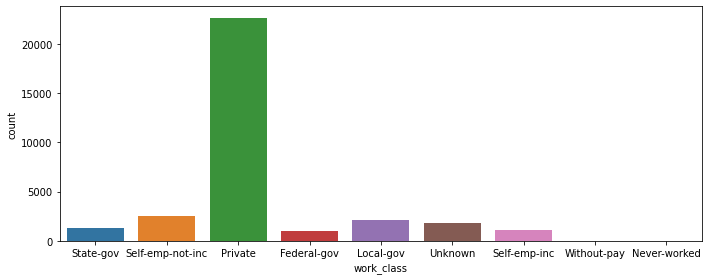

In [29]:
fig = plt.figure(figsize=(10,4))
sns.countplot(train['work_class'])
plt.tight_layout()

**We can see that most of the individuals in the data work for private organizations.**

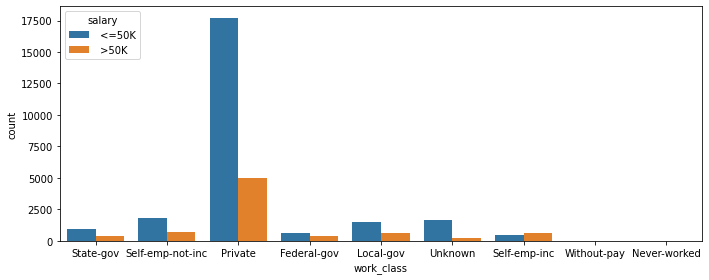

In [30]:
fig = plt.figure(figsize=(10,4))
sns.countplot(train['work_class'],hue=train['salary'])
plt.tight_layout()

**We can see that of all the classes, only the Self Employed(Incorporated) have more no. of data points with salary >50k as compared to no. of data points with salary <=50k.**

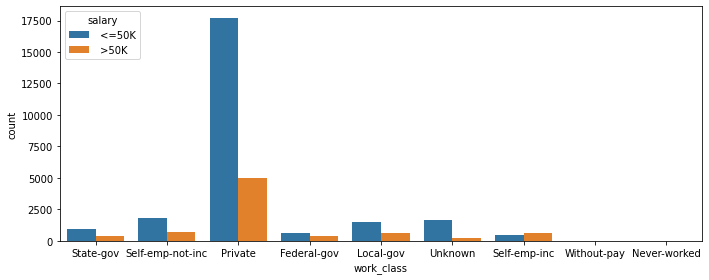

In [31]:
fig = plt.figure(figsize=(10,4))
sns.countplot(train['work_class'],hue=train['salary'])
plt.tight_layout()

**We can see that the private sector is dominated by middle aged individuals and other have higher number of Seniors.**

### Analysis of Occupation column

In [32]:
train['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [33]:
train['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

**We can see that the names of the categories have a space before them and we also have to replace the " ?" with "Unknown".**

In [34]:
train['occupation'] = remove_space(train['occupation'])

In [35]:
train['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Unknown              1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

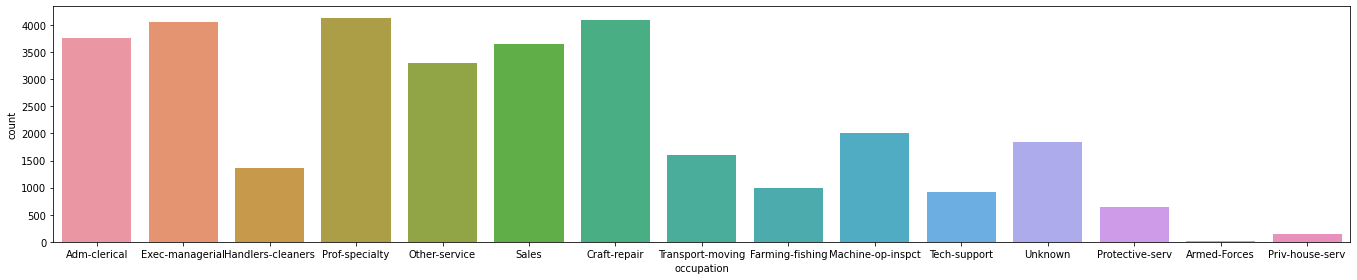

In [36]:
fig = plt.figure(figsize=(19,4))
sns.countplot(train['occupation'])
plt.tight_layout()

**We can see that minimum number of people work in "armed forces","Protective Services" and "Private housing services".**

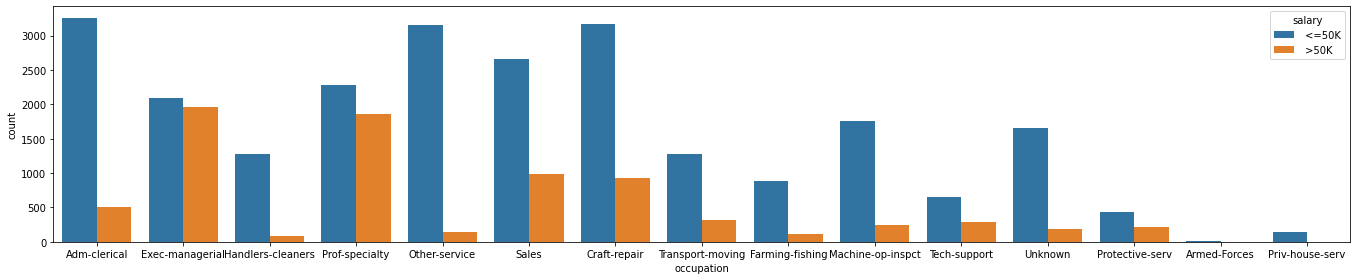

In [37]:
fig = plt.figure(figsize=(19,4))
sns.countplot(train['occupation'],hue = train['salary'])
plt.tight_layout()

**We can see that maximum approximately 40% of the people working in the "Exec-manegerial" and "Prof-Speciality" feids have a salary >50k. Very few people with occpations of "Armed-forces","Private housing","Handlers-cleaners" have a salary of >50k.**

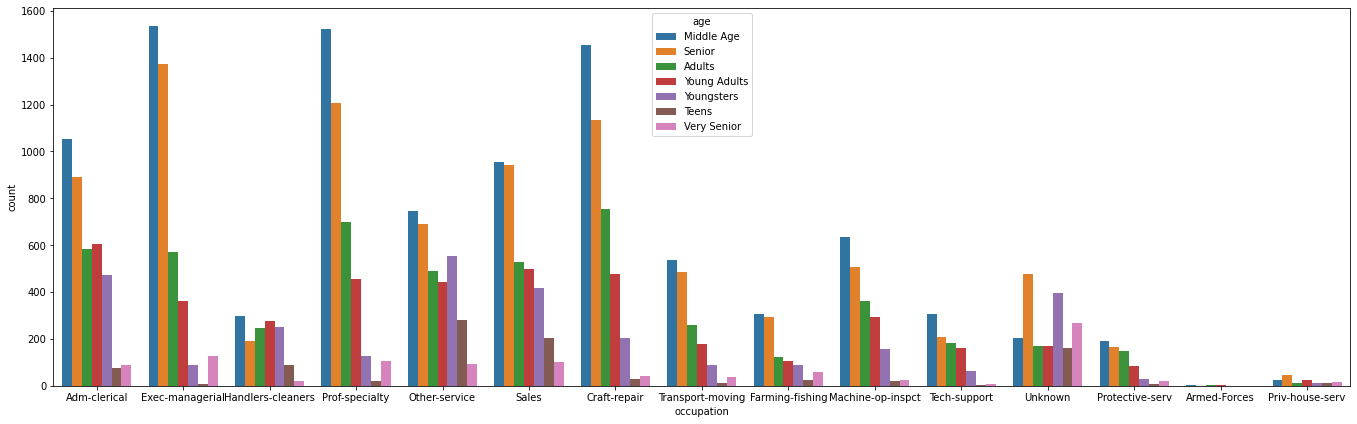

In [38]:
fig = plt.figure(figsize=(19,6))
sns.countplot(train['occupation'],hue = train['age'],)
plt.tight_layout()

**We can see that maximum number of people working in each of the fields are "Middle Aged" followed by "Senior" and "Adults".**

**Private Housing Services have more "Senior" individuals.**

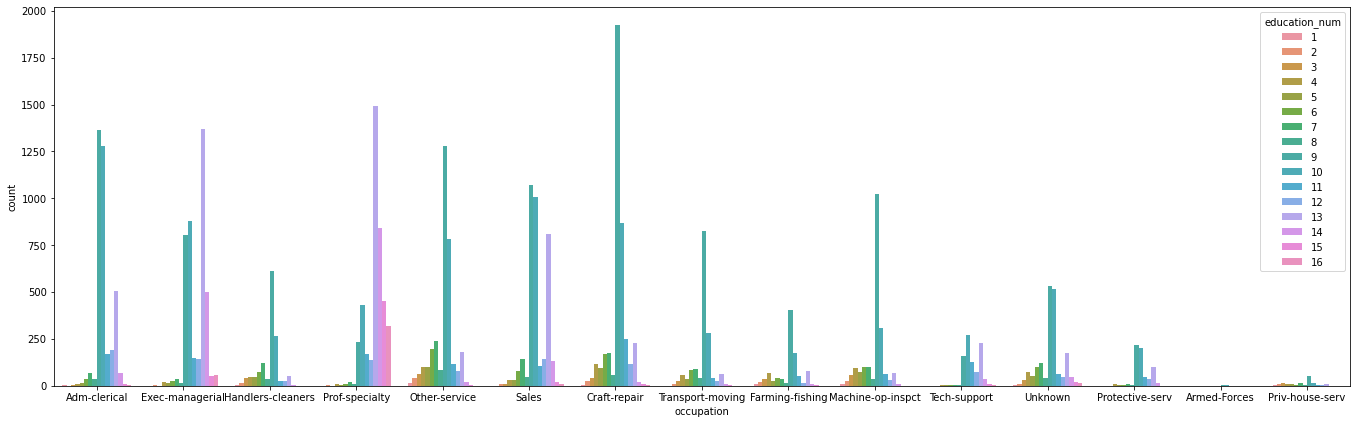

In [39]:
fig = plt.figure(figsize=(19,6))
sns.countplot(train['occupation'],hue = train['education_num'],)
plt.tight_layout()

**There is a clear dominance of people with higher education in all the field of "exec-managerial" and "prof-speciality". All other fields are dominated by people who have studied maximum till 12th grade.**

### Analysis of marital status column

In [40]:
train['marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64

**Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces.**

In [41]:
train['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [42]:
train['marital_status'] = remove_space(train['marital_status'])

In [43]:
train['marital_status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

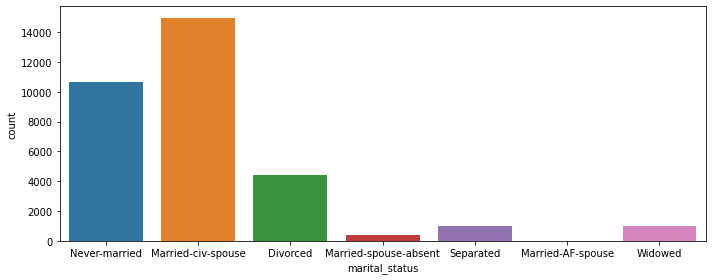

In [44]:
fig = plt.figure(figsize=(10,4))
sns.countplot(train['marital_status'])
plt.tight_layout()

**We can see that maximum people in our data are married with a civilian spouse or never married.**

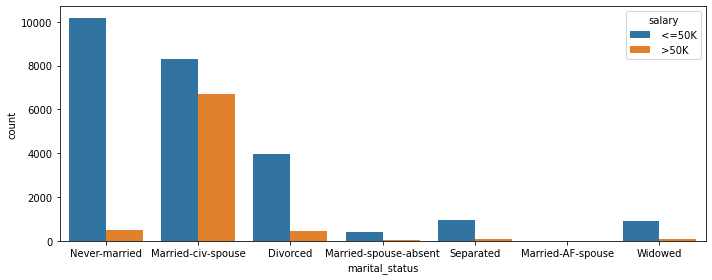

In [45]:
fig = plt.figure(figsize=(10,4))
sns.countplot(train['marital_status'],hue = train['salary'])
plt.tight_layout()

**The above plot shows that maximum number of people in our data with salary >50k are married with a civilian spouse.**

**As all other classes except "never married" and "married-civ-spouse" have very few data points in them so we can tranform this data to 3 categories: "married" and "not married" and "divorced".**

In [46]:
train["marital_status"].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [47]:
train['marital_status']=train['marital_status'].map({'Never-married': "never married", 'Married-civ-spouse':"married", 'Divorced':"divorced",
       'Married-spouse-absent':"married", 'Separated':"married", 'Married-AF-spouse':"married",
       'Widowed':"married"})

In [48]:
train.head()

,age,work_class,final_weight,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,Middle Age,State-gov,77516,13,never married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Senior,Self-emp-not-inc,83311,13,married,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Middle Age,Private,215646,9,divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Senior,Private,234721,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Adults,Private,338409,13,married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Univariate analysis on native country column

In [49]:
train['native_country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

**We can see that most of the individuals in our data hav their nativ country as USA. Therfore we can reduce the number of catgories in this column to 32 categories: "USA" and "Others".**

In [50]:
train['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [51]:
train['native_country'] = remove_space(train['native_country'])

In [52]:
train['native_country'].unique()

array(['United-States', 'Cuba', 'Jamaica', 'India', 'Unknown', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [53]:
train['native_country'] = train['native_country'].map({'United-States':"USA", 'Cuba':"Others", 
        'Jamaica':"Others", 'India':"Others", 'Unknown':"Others", 'Mexico':"Others",
       'South':"Others", 'Puerto-Rico':"Others", 'Honduras':"Others", 'England':"Others", 'Canada':"Others", 'Germany':"Others",
       'Iran':"Others", 'Philippines':"Others", 'Italy':"Others", 'Poland':"Others", 'Columbia':"Others", 'Cambodia':"Others",
       'Thailand':"Others", 'Ecuador':"Others", 'Laos':"Others", 'Taiwan':"Others", 'Haiti':"Others", 'Portugal':"Others",
       'Dominican-Republic':"Others", 'El-Salvador':"Others", 'France':"Others", 'Guatemala':"Others",
       'China':"Others", 'Japan':"Others", 'Yugoslavia':"Others", 'Peru':"Others",
       'Outlying-US(Guam-USVI-etc)':"Others", 'Scotland':"Others", 'Trinadad&Tobago':"Others",
       'Greece':"Others", 'Nicaragua':"Others", 'Vietnam':"Others", 'Hong':"Others", 'Ireland':"Others", 'Hungary':"Others",
       'Holand-Netherlands':"Others"})    # changing "native_country" column to 2 categories.

In [54]:
train['native_country'] = train['native_country'].map({"USA":1,"Others":0})

In [55]:
train['native_country'].value_counts()

1    29170
0     3391
Name: native_country, dtype: int64

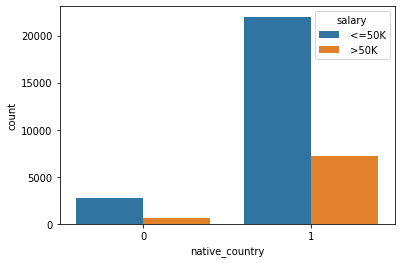

In [56]:
sns.countplot(train['native_country'],hue=train['salary'],)

In [57]:
train.head()

,age,work_class,final_weight,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,Middle Age,State-gov,77516,13,never married,Adm-clerical,Not-in-family,White,Male,2174,0,40,1,<=50K
1,Senior,Self-emp-not-inc,83311,13,married,Exec-managerial,Husband,White,Male,0,0,13,1,<=50K
2,Middle Age,Private,215646,9,divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,1,<=50K
3,Senior,Private,234721,7,married,Handlers-cleaners,Husband,Black,Male,0,0,40,1,<=50K
4,Adults,Private,338409,13,married,Prof-specialty,Wife,Black,Female,0,0,40,0,<=50K


**Dropping the race column, as Sex and relation ship columns are highly correlated therefore dropping the "relationship" column.**

In [58]:
train.drop(labels=["race"],axis=1,inplace=True)

In [59]:
train.drop(labels=["relationship"],axis=1,inplace=True)

In [60]:
train['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [61]:
train['sex'] = train['sex'].map({" Male":0," Female":1})

In [62]:
train['marital_status'] = train['marital_status'].map({"never married":0,"married":1,"divorced":1})

In [64]:
train.head()

,age,work_class,final_weight,education_num,marital_status,occupation,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,Middle Age,State-gov,77516,13,0,Adm-clerical,0,2174,0,40,1,<=50K
1,Senior,Self-emp-not-inc,83311,13,1,Exec-managerial,0,0,0,13,1,<=50K
2,Middle Age,Private,215646,9,1,Handlers-cleaners,0,0,0,40,1,<=50K
3,Senior,Private,234721,7,1,Handlers-cleaners,0,0,0,40,1,<=50K
4,Adults,Private,338409,13,1,Prof-specialty,1,0,0,40,0,<=50K


In [65]:
train['hours_per_week'].describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

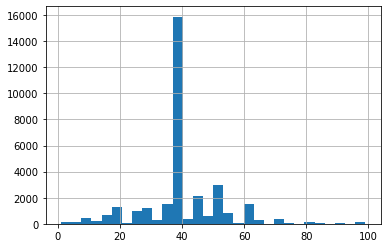

In [66]:
train['hours_per_week'].hist(bins=30)

**A significant number of population works for 40 hrs per week. Some also work for more than 80 hrs per week.**

### Univariate analysis on Capital gain

In [67]:
train['capital_gain'].describe()

count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gain, dtype: float64

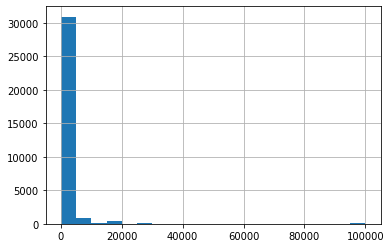

In [68]:
train['capital_gain'].hist(bins=20)

**Most of the people have a capital gain of 0.**

In [69]:
train[train['capital_gain']>0].describe()

,final_weight,education_num,marital_status,sex,capital_gain,capital_loss,hours_per_week,native_country
count,2.712000e+03,2712.000000,2712.000000,2712.00000,2712.000000,2712.0,2712.000000,2712.000000
mean,1.880805e+05,11.066003,0.832227,0.22972,12938.541298,0.0,43.510324,0.911136
std,1.033775e+05,2.663273,0.373733,0.42073,22395.413530,0.0,12.207654,0.284600
min,1.930200e+04,1.000000,0.000000,0.00000,114.000000,0.0,1.000000,0.000000
25%,1.180670e+05,9.000000,1.000000,0.00000,3411.000000,0.0,40.000000,1.000000
50%,1.759390e+05,10.000000,1.000000,0.00000,7298.000000,0.0,40.000000,1.000000
75%,2.364735e+05,13.000000,1.000000,0.00000,14084.000000,0.0,50.000000,1.000000
max,1.033222e+06,16.000000,1.000000,1.00000,99999.000000,0.0,99.000000,1.000000


### Univariate Analysis on Capital Loss

In [70]:
train['capital_loss'].describe()

count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital_loss, dtype: float64

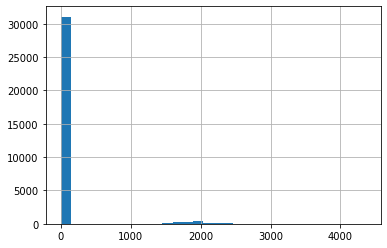

In [71]:
train['capital_loss'].hist(bins=30)

In [72]:
train[train['capital_loss']>0].describe()

,final_weight,education_num,marital_status,sex,capital_gain,capital_loss,hours_per_week,native_country
count,1519.000000,1519.000000,1519.000000,1519.000000,1519.0,1519.000000,1519.000000,1519.000000
mean,185492.941409,10.969059,0.793285,0.242923,0.0,1871.428571,43.252798,0.907834
std,97621.521906,2.688426,0.405083,0.428990,0.0,376.571535,12.247258,0.289355
min,20953.000000,1.000000,0.000000,0.000000,0.0,155.000000,1.000000,0.000000
25%,118854.000000,9.000000,1.000000,0.000000,0.0,1672.000000,40.000000,1.000000
50%,175109.000000,10.000000,1.000000,0.000000,0.0,1887.000000,40.000000,1.000000
75%,228991.500000,13.000000,1.000000,0.000000,0.0,1977.000000,50.000000,1.000000
max,816750.000000,16.000000,1.000000,1.000000,0.0,4356.000000,99.000000,1.000000


In [73]:
train['salary']=train['salary'].map({" <=50K":0, " >50K":1})

In [74]:
train.head()

,age,work_class,final_weight,education_num,marital_status,occupation,sex,capital_gain,capital_loss,hours_per_week,native_country,salary
0,Middle Age,State-gov,77516,13,0,Adm-clerical,0,2174,0,40,1,0
1,Senior,Self-emp-not-inc,83311,13,1,Exec-managerial,0,0,0,13,1,0
2,Middle Age,Private,215646,9,1,Handlers-cleaners,0,0,0,40,1,0
3,Senior,Private,234721,7,1,Handlers-cleaners,0,0,0,40,1,0
4,Adults,Private,338409,13,1,Prof-specialty,1,0,0,40,0,0


In [75]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  object
 1   work_class      32561 non-null  object
 2   final_weight    32561 non-null  int64 
 3   education_num   32561 non-null  int64 
 4   marital_status  32561 non-null  int64 
 5   occupation      32561 non-null  object
 6   sex             32561 non-null  int64 
 7   capital_gain    32561 non-null  int64 
 8   capital_loss    32561 non-null  int64 
 9   hours_per_week  32561 non-null  int64 
 10  native_country  32561 non-null  int64 
 11  salary          32561 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 3.0+ MB


In [76]:
train['work_class'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
Unknown              1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: work_class, dtype: int64

## One Hot Encoding Categorical Features

In [77]:
col_list = list(train.select_dtypes(include=['object']).columns)
for i in col_list:
    train = pd.concat([train,pd.get_dummies(train[i], prefix=i)],axis=1)
    train.drop(i, axis = 1, inplace=True)

In [78]:
train.head()

,final_weight,education_num,marital_status,sex,capital_gain,capital_loss,hours_per_week,native_country,salary,age_Adults,age_Middle Age,age_Senior,age_Teens,age_Very Senior,age_Young Adults,age_Youngsters,work_class_Federal-gov,work_class_Local-gov,work_class_Never-worked,work_class_Private,work_class_Self-emp-inc,work_class_Self-emp-not-inc,work_class_State-gov,work_class_Unknown,work_class_Without-pay,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,occupation_Unknown
0,77516,13,0,0,2174,0,40,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,83311,13,1,0,0,0,13,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,215646,9,1,0,0,0,40,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,234721,7,1,0,0,0,40,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,338409,13,1,1,0,0,40,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [79]:
train.columns

Index(['final_weight', 'education_num', 'marital_status', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary', 'age_Adults', 'age_Middle Age', 'age_Senior', 'age_Teens',
       'age_Very Senior', 'age_Young Adults', 'age_Youngsters',
       'work_class_Federal-gov', 'work_class_Local-gov',
       'work_class_Never-worked', 'work_class_Private',
       'work_class_Self-emp-inc', 'work_class_Self-emp-not-inc',
       'work_class_State-gov', 'work_class_Unknown', 'work_class_Without-pay',
       'occupation_Adm-clerical', 'occupation_Armed-Forces',
       'occupation_Craft-repair', 'occupation_Exec-managerial',
       'occupation_Farming-fishing', 'occupation_Handlers-cleaners',
       'occupation_Machine-op-inspct', 'occupation_Other-service',
       'occupation_Priv-house-serv', 'occupation_Prof-specialty',
       'occupation_Protective-serv', 'occupation_Sales',
       'occupation_Tech-support', 'occupation_Transport-moving',
       'occupa

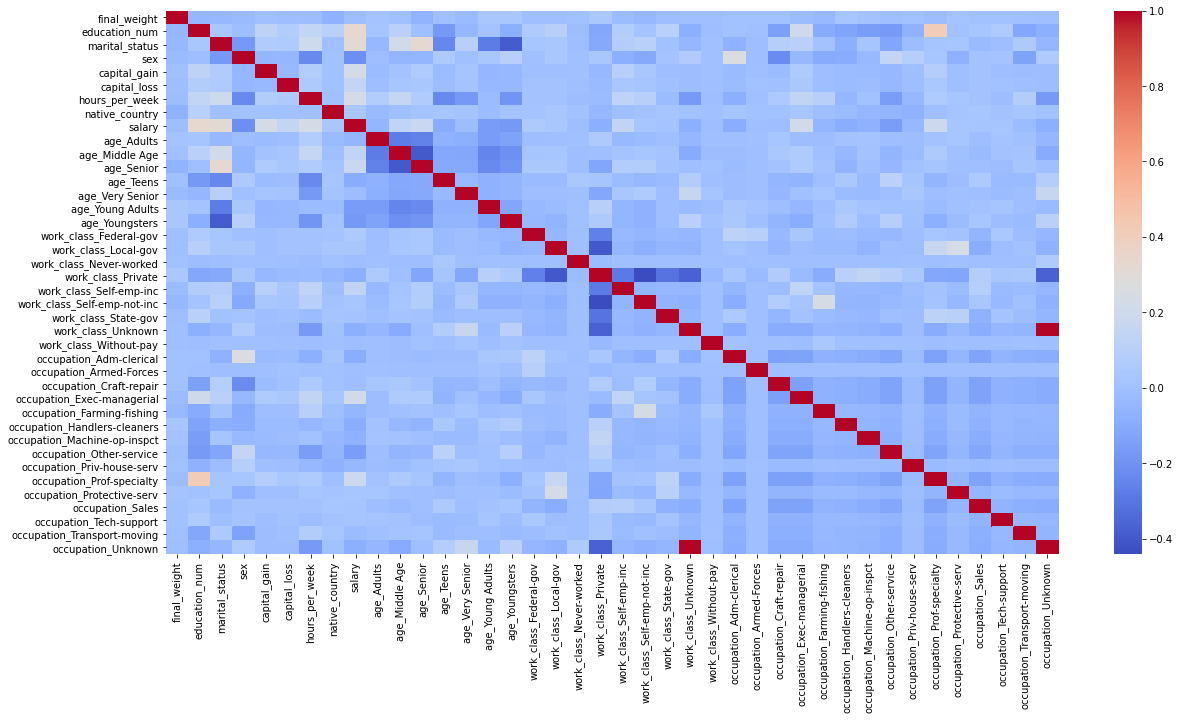

In [80]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),cmap="coolwarm")

**Removing the highly correlated features**

In [81]:
train.drop(labels=["work_class_Unknown","occupation_Unknown","work_class_Self-emp-not-inc","work_class_Local-gov"],axis=1,inplace=True)

In [82]:
train.head()

,final_weight,education_num,marital_status,sex,capital_gain,capital_loss,hours_per_week,native_country,salary,age_Adults,age_Middle Age,age_Senior,age_Teens,age_Very Senior,age_Young Adults,age_Youngsters,work_class_Federal-gov,work_class_Never-worked,work_class_Private,work_class_Self-emp-inc,work_class_State-gov,work_class_Without-pay,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,77516,13,0,0,2174,0,40,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,83311,13,1,0,0,0,13,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,215646,9,1,0,0,0,40,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,234721,7,1,0,0,0,40,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,338409,13,1,1,0,0,40,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


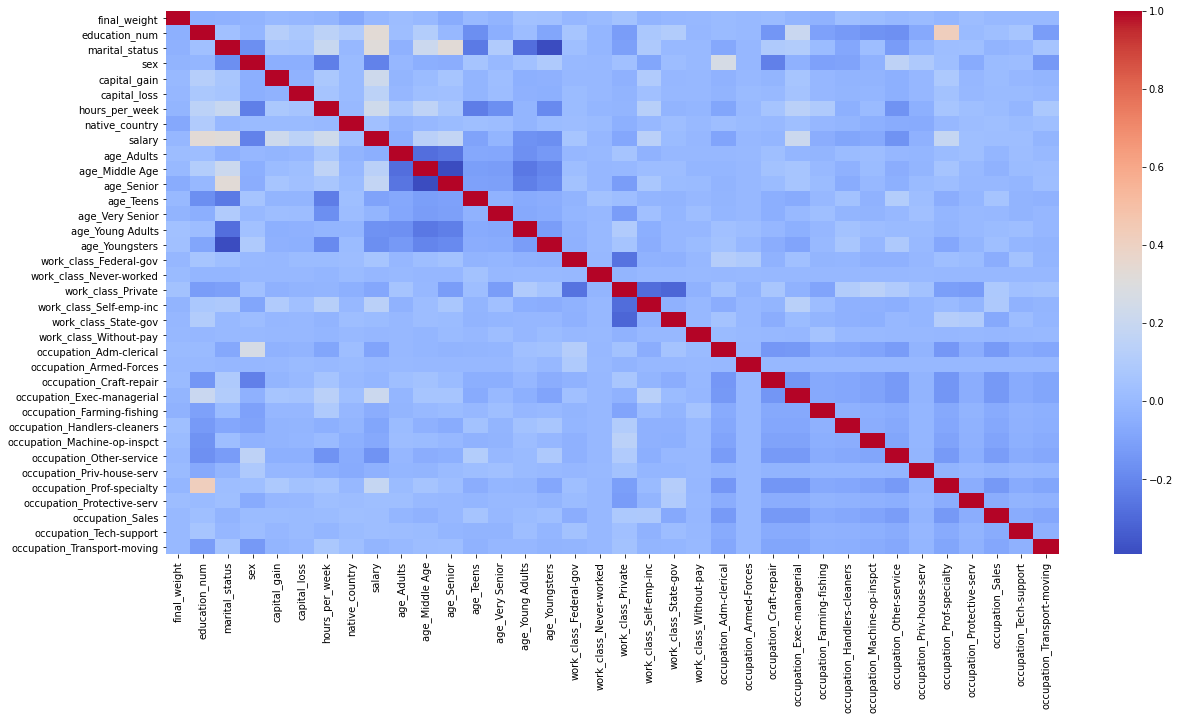

In [83]:
plt.figure(figsize=(20,10))
sns.heatmap(train.corr(),cmap="coolwarm")

In [84]:
train.columns

Index(['final_weight', 'education_num', 'marital_status', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'salary', 'age_Adults', 'age_Middle Age', 'age_Senior', 'age_Teens',
       'age_Very Senior', 'age_Young Adults', 'age_Youngsters',
       'work_class_Federal-gov', 'work_class_Never-worked',
       'work_class_Private', 'work_class_Self-emp-inc', 'work_class_State-gov',
       'work_class_Without-pay', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support',
       'occupation_Transport-moving'],
      dtype='object')

In [85]:
train.head()

,final_weight,education_num,marital_status,sex,capital_gain,capital_loss,hours_per_week,native_country,salary,age_Adults,age_Middle Age,age_Senior,age_Teens,age_Very Senior,age_Young Adults,age_Youngsters,work_class_Federal-gov,work_class_Never-worked,work_class_Private,work_class_Self-emp-inc,work_class_State-gov,work_class_Without-pay,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,77516,13,0,0,2174,0,40,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,83311,13,1,0,0,0,13,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,215646,9,1,0,0,0,40,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,234721,7,1,0,0,0,40,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,338409,13,1,1,0,0,40,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


## Standardizing The Data

In [86]:
categorical = train[['age_Adults', 'age_Middle Age', 'age_Senior', 'age_Teens',
       'age_Very Senior', 'age_Young Adults', 'age_Youngsters',
       'work_class_Federal-gov', 'work_class_Never-worked',
       'work_class_Private', 'work_class_Self-emp-inc', 'work_class_State-gov',
       'work_class_Without-pay', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support','education_num', 'marital_status', 'sex',
       'occupation_Transport-moving']]
numerical = train[['final_weight', 'capital_gain', 'capital_loss', 'hours_per_week']]
y = train['salary']

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
scaler = StandardScaler()
scaler.fit(numerical)
scaled_X = scaler.transform(numerical)

In [89]:
num_scaled = pd.DataFrame(scaled_X,columns=['final_weight', 'capital_gain', 'capital_loss', 'hours_per_week'])

In [90]:
num_scaled.shape

(32561, 4)

In [91]:
scaled_X = pd.concat([categorical,num_scaled],axis=1)

In [92]:
scaled_X.head()

,age_Adults,age_Middle Age,age_Senior,age_Teens,age_Very Senior,age_Young Adults,age_Youngsters,work_class_Federal-gov,work_class_Never-worked,work_class_Private,work_class_Self-emp-inc,work_class_State-gov,work_class_Without-pay,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,education_num,marital_status,sex,occupation_Transport-moving,final_weight,capital_gain,capital_loss,hours_per_week
0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0,0,-1.063611,0.148453,-0.21666,-0.035429
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,13,1,0,0,-1.008707,-0.145920,-0.21666,-2.222153
2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,9,1,0,0,0.245079,-0.145920,-0.21666,-0.035429
3,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,1,0,0,0.425801,-0.145920,-0.21666,-0.035429
4,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,13,1,1,0,1.408176,-0.145920,-0.21666,-0.035429


In [93]:
scaled_X.columns

Index(['age_Adults', 'age_Middle Age', 'age_Senior', 'age_Teens',
       'age_Very Senior', 'age_Young Adults', 'age_Youngsters',
       'work_class_Federal-gov', 'work_class_Never-worked',
       'work_class_Private', 'work_class_Self-emp-inc', 'work_class_State-gov',
       'work_class_Without-pay', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support', 'education_num',
       'marital_status', 'sex', 'occupation_Transport-moving', 'final_weight',
       'capital_gain', 'capital_loss', 'hours_per_week'],
      dtype='object')

## Train and Cross Validation split

In [94]:
from sklearn.model_selection import train_test_split

In [95]:
X_train, X_val, y_train, y_val = train_test_split(scaled_X, y, test_size=0.25)

In [96]:
y_val.value_counts()

0    6152
1    1989
Name: salary, dtype: int64

## Modelling Without Oversampling minority class

In [97]:
import sys
sys.path.insert(0, "C:/Users/aryan/PycharmProjects")
import more_functions

ModuleNotFoundError: ignored

In [ ]:
from more_functions.train_tune import basic_evaluation

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.linear_model import SGDClassifier

Training and predicting on default parameters: 

F1 Score on Train data:  0.6505361930294906
F1 Score on Test data:  0.6494929006085192 

Classification Report of predictions on Test data:

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      6194
           1       0.54      0.82      0.65      1947

    accuracy                           0.79      8141
   macro avg       0.73      0.80      0.75      8141
weighted avg       0.84      0.79      0.80      8141
 

Confusion Matrix of predictions on Test data:

Time taken to run this function:  0:00:01.255093


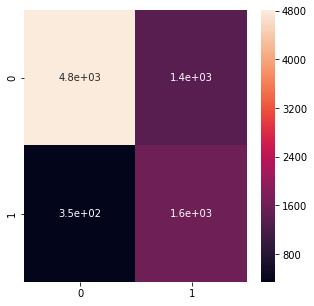

In [ ]:
basic_evaluation(LogisticRegression(class_weight={0:1,1:3.2}),X_train,X_val,y_train,y_val,metric="f1")

In [ ]:
# basic_evaluation(SVC(),X_train,X_val,y_train,y_val,metric="f1")

Training and predicting on default parameters: 

F1 Score on Train data:  0.4517955479717677
F1 Score on Test data:  0.45206766917293234 

Classification Report of predictions on Test data:

              precision    recall  f1-score   support

           0       0.99      0.25      0.40      6194
           1       0.29      0.99      0.45      1947

    accuracy                           0.43      8141
   macro avg       0.64      0.62      0.43      8141
weighted avg       0.82      0.43      0.41      8141
 

Confusion Matrix of predictions on Test data:

Time taken to run this function:  0:00:00.477118


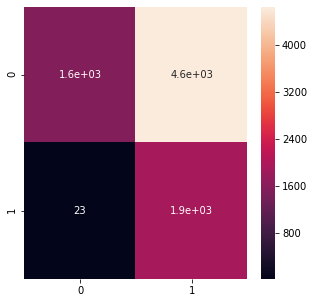

In [ ]:
basic_evaluation(GaussianNB(),X_train,X_val,y_train,y_val,metric="f1")

Training and predicting on default parameters: 

F1 Score on Train data:  0.9932565087494665
F1 Score on Test data:  0.5956607495069033 

Classification Report of predictions on Test data:

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      6187
           1       0.66      0.54      0.60      1954

    accuracy                           0.82      8141
   macro avg       0.76      0.73      0.74      8141
weighted avg       0.81      0.82      0.82      8141
 

Confusion Matrix of predictions on Test data:

Time taken to run this function:  0:00:02.300967


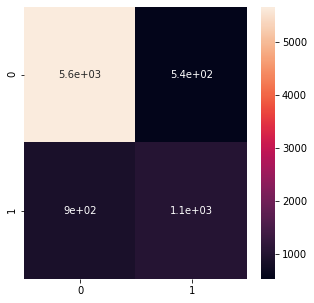

In [ ]:
basic_evaluation(RandomForestClassifier(n_estimators=30,class_weight={0:1,1:3.2}),X_train,X_val,y_train,y_val,metric="f1")

Training and predicting on default parameters: 

F1 Score on Train data:  0.6965587231294401
F1 Score on Test data:  0.5971243304200733 

Classification Report of predictions on Test data:

              precision    recall  f1-score   support

           0       0.86      0.91      0.89      6194
           1       0.66      0.54      0.60      1947

    accuracy                           0.82      8141
   macro avg       0.76      0.73      0.74      8141
weighted avg       0.82      0.82      0.82      8141
 

Confusion Matrix of predictions on Test data:

Time taken to run this function:  0:00:42.727852


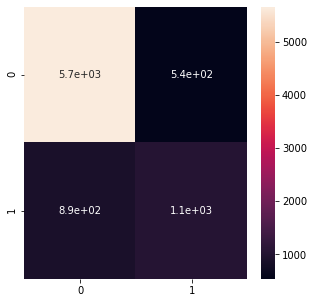

In [ ]:
basic_evaluation(KNeighborsClassifier(),X_train,X_val,y_train,y_val,metric="f1")

Training and predicting on default parameters: 

F1 Score on Train data:  0.6477536597677941
F1 Score on Test data:  0.6156693399136336 

Classification Report of predictions on Test data:

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6187
           1       0.77      0.51      0.62      1954

    accuracy                           0.85      8141
   macro avg       0.82      0.73      0.76      8141
weighted avg       0.84      0.85      0.84      8141
 

Confusion Matrix of predictions on Test data:

Time taken to run this function:  0:00:03.510041


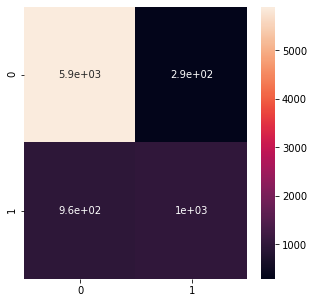

In [ ]:
basic_evaluation(xgb.XGBClassifier(),X_train,X_val,y_train,y_val,metric="f1")

## Modelling with Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler

In [ ]:
sm = RandomOverSampler()
X_sm,y_sm=sm.fit_sample(X_train,y_train)

In [ ]:
y_sm.value_counts()

1    18526
0    18526
Name: salary, dtype: int64

Training and predicting on default parameters: 

F1 Score on Train data:  0.8006254472212652
F1 Score on Test data:  0.6495098039215687 

Classification Report of predictions on Test data:

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      6194
           1       0.54      0.82      0.65      1947

    accuracy                           0.79      8141
   macro avg       0.74      0.80      0.75      8141
weighted avg       0.84      0.79      0.80      8141
 

Confusion Matrix of predictions on Test data:

Time taken to run this function:  0:00:01.679264


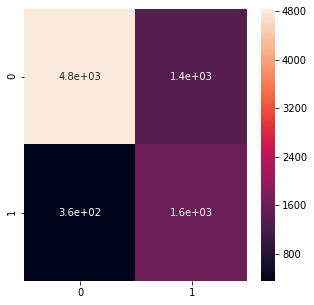

In [ ]:
basic_evaluation(LogisticRegression(),X_sm,X_val,y_sm,y_val,metric="f1")

Training and predicting on default parameters: 

F1 Score on Train data:  0.9989480214711515
F1 Score on Test data:  0.6368107688325135 

Classification Report of predictions on Test data:

              precision    recall  f1-score   support

           0       0.88      0.89      0.89      6194
           1       0.64      0.63      0.64      1947

    accuracy                           0.83      8141
   macro avg       0.76      0.76      0.76      8141
weighted avg       0.83      0.83      0.83      8141
 

Confusion Matrix of predictions on Test data:

Time taken to run this function:  0:00:04.663981


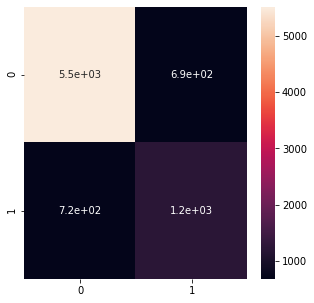

In [ ]:
basic_evaluation(RandomForestClassifier(n_estimators=30),X_sm,X_val,y_sm,y_val,metric="f1")

Training and predicting on default parameters: 

F1 Score on Train data:  0.8562657820468387
F1 Score on Test data:  0.4335449124831699 

Classification Report of predictions on Test data:

              precision    recall  f1-score   support

           0       0.83      0.66      0.73      6187
           1       0.35      0.58      0.43      1954

    accuracy                           0.64      8141
   macro avg       0.59      0.62      0.58      8141
weighted avg       0.71      0.64      0.66      8141
 

Confusion Matrix of predictions on Test data:

Time taken to run this function:  0:00:06.807701


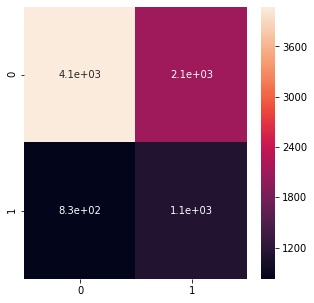

In [ ]:
basic_evaluation(KNeighborsClassifier(),X_sm,X_val,y_sm,y_val,metric="f1")

Training and predicting on default parameters: 

F1 Score on Train data:  0.8147108663418767
F1 Score on Test data:  0.6665288401902006 

Classification Report of predictions on Test data:

              precision    recall  f1-score   support

           0       0.94      0.79      0.86      6194
           1       0.56      0.83      0.67      1947

    accuracy                           0.80      8141
   macro avg       0.75      0.81      0.76      8141
weighted avg       0.85      0.80      0.81      8141
 

Confusion Matrix of predictions on Test data:

Time taken to run this function:  0:00:05.907522


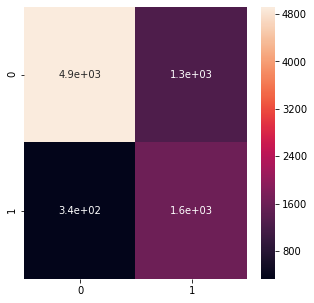

In [ ]:
basic_evaluation(xgb.XGBClassifier(),X_sm,X_val,y_sm,y_val,metric="f1")

**Grid tuning on XGBOOST**

In [ ]:
from more_functions.train_tune import grid_tuning

In [ ]:
grid_tuning(xgb.XGBClassifier(),X_sm,X_val,y_sm,y_val,{"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25 ] ,
 "max_depth"        : [6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] },metric="f1",cv=3)

Fitting 3 folds for each of 2000 candidates, totalling 6000 fits
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=1 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=1, score=0.821, total=   3.5s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=1 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.4s remaining:    0.0s


[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=1, score=0.822, total=   3.3s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=1 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    6.7s remaining:    0.0s


[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=1, score=0.824, total=   3.3s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, score=0.820, total=   3.4s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, score=0.821, total=   2.6s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, score=0.823, total=   2.5s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, score=0.819, total=   2.6s
[CV] colsample_bytree=0.3, gamma=0.0, lea

[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=3, score=0.843, total=   4.5s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=5, score=0.836, total=   4.5s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=5, score=0.838, total=   4.4s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=5, score=0.840, total=   4.5s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=7, score=0.833, total=   4.7s
[CV] colsample_bytree=0.3, gamma

[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=7, score=0.830, total=   4.1s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=7, score=0.833, total=   3.5s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=7, score=0.836, total=   3.8s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1, score=0.850, total=   4.0s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1, score=0.853, total=   4.8s
[CV] colsample_bytree=0.3, gamma=0.0, learning

[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=1, score=0.833, total=   2.4s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=1, score=0.835, total=   2.7s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=3, score=0.829, total=   2.4s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=3, score=0.831, total=   2.5s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=3, score=0.833, total=   3.2s
[CV] colsample_bytree=0.3, gamma=0.0, lea

[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=3, score=0.859, total=   4.4s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=3, score=0.860, total=   4.7s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=5, score=0.850, total=   4.6s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=5, score=0.853, total=   4.6s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=5, score=0.851, total=   4.2s
[CV] colsample_bytree=0.3, gamma

[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=5, score=0.844, total=   3.2s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=7, score=0.835, total=   3.4s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=7, score=0.838, total=   3.2s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=7, score=0.839, total=   3.4s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=10, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.2, max_depth=10, min_child_weight=1, score=0.858, total=   4.1s
[CV] colsample_bytree=0.3, gamma=0.0, learning_r

[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=1, score=0.838, total=   3.0s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=1, score=0.836, total=   2.5s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=1, score=0.839, total=   2.9s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=3, score=0.834, total=   2.5s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=3, score=0.834, total=   2.8s
[CV] colsample_bytree=0.3, gamma=0.0, lea

[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=3, score=0.861, total=   4.5s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=3, score=0.862, total=   4.6s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=3, score=0.865, total=   4.2s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=5, score=0.855, total=   4.4s
[CV] colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=5, score=0.856, total=   4.7s
[CV] colsample_bytree=0.3, gamma

[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=5, score=0.824, total=   3.5s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=5, score=0.826, total=   3.3s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=5, score=0.829, total=   3.6s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=7, score=0.825, total=   3.2s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=7, score=0.825, total=   3.6s
[CV] colsample_bytree=0.3, gamma=0.1, lea

[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=15, min_child_weight=7, score=0.837, total=   5.2s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=15, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=15, min_child_weight=7, score=0.838, total=   5.1s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=15, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.05, max_depth=15, min_child_weight=7, score=0.840, total=   5.5s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, score=0.828, total=   2.7s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, score=0.830, total=   2.8s
[CV] colsample_bytree=0.3, gamma=0.1, le

[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=1, score=0.861, total=   4.9s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=1, score=0.864, total=   5.2s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=3, score=0.851, total=   4.4s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=3, score=0.854, total=   4.6s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=3, score=0.855, total=   4.7s
[CV] colsample_bytree=0.3, gamma=0.1, lea

[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=3, score=0.840, total=   3.9s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=5, score=0.837, total=   3.5s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=5, score=0.838, total=   3.3s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=5, score=0.841, total=   3.7s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=7, score=0.834, total=   3.1s
[CV] colsample_bytree=0.3, gamma=0.1, lea

[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=15, min_child_weight=5, score=0.860, total=   5.2s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=15, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=15, min_child_weight=7, score=0.849, total=   5.5s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=15, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=15, min_child_weight=7, score=0.851, total=   5.1s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=15, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.15, max_depth=15, min_child_weight=7, score=0.854, total=   5.2s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, score=0.836, total=   2.5s
[CV] colsample_bytree=0.3, gamma=0.1

[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=1, score=0.870, total=   4.7s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=1, score=0.870, total=   4.4s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=1, score=0.874, total=   4.7s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=3, score=0.861, total=   4.5s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=3, score=0.860, total=   4.6s
[CV] colsample_bytree=0.3, gamma=0.1, lea

[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=3, score=0.846, total=   3.0s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=3, score=0.848, total=   3.3s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=5, score=0.840, total=   3.0s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=5, score=0.840, total=   3.4s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=5, score=0.843, total=   3.1s
[CV] colsample_bytree=0.3, gamma=0.1, lea

[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=5, score=0.864, total=   4.9s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=5, score=0.864, total=   5.5s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=7, score=0.854, total=   5.0s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=7, score=0.859, total=   5.5s
[CV] colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=7, score=0.861, total=   4.6s
[CV] colsample_bytree=0.3, gamma

[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=7, score=0.829, total=   3.9s
[CV] colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=7, score=0.833, total=   4.0s
[CV] colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=12, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=12, min_child_weight=1, score=0.846, total=   4.5s
[CV] colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=12, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=12, min_child_weight=1, score=0.849, total=   4.6s
[CV] colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=12, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.05, max_depth=12, min_child_weight=1, score=0.848, total=   4.5s
[CV] colsample_bytree=0.3, gamma

[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=1, score=0.840, total=   3.1s
[CV] colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=1, score=0.842, total=   3.5s
[CV] colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=3, score=0.834, total=   3.1s
[CV] colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=3, score=0.837, total=   3.4s
[CV] colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=3, score=0.839, total=   3.4s
[CV] colsample_bytree=0.3, gamma=0.2, learning_rat

[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=3, score=0.862, total=   5.2s
[CV] colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=5, score=0.851, total=   4.7s
[CV] colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=5, score=0.856, total=   5.2s
[CV] colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=5, score=0.855, total=   5.2s
[CV] colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=7, score=0.846, total=   5.1s
[CV] colsample_bytree=0.3, gamma=0.2, lea

[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=5, score=0.848, total=   3.8s
[CV] colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=7, score=0.841, total=   3.6s
[CV] colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=7, score=0.841, total=   4.1s
[CV] colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=7, score=0.843, total=   3.9s
[CV] colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=12, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.15, max_depth=12, min_child_weight=1, score=0.865, total=   4.3s
[CV] colsample_bytree=0.3, gamma

[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=7, score=0.833, total=   2.4s
[CV] colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=1, score=0.848, total=   3.4s
[CV] colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=1, score=0.846, total=   3.0s
[CV] colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=1, score=0.851, total=   3.4s
[CV] colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=3, score=0.841, total=   2.9s
[CV] colsample_bytree=0.3, gamma=0.2, learning_rat

[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=3, score=0.871, total=   5.0s
[CV] colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=3, score=0.874, total=   5.0s
[CV] colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=3, score=0.870, total=   5.0s
[CV] colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=5, score=0.859, total=   5.0s
[CV] colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=5, score=0.861, total=   4.8s
[CV] colsample_bytree=0.3, gamma=0.2, lea

[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=5, score=0.847, total=   3.8s
[CV] colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=5, score=0.848, total=   3.6s
[CV] colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=5, score=0.854, total=   3.8s
[CV] colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=7, score=0.845, total=   3.7s
[CV] colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=7, score=0.842, total=   3.8s
[CV] colsample_bytree=0.3, gamma

[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=6, min_child_weight=7, score=0.818, total=   3.5s
[CV] colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=6, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=6, min_child_weight=7, score=0.818, total=   2.4s
[CV] colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=6, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=6, min_child_weight=7, score=0.821, total=   2.7s
[CV] colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=1, score=0.830, total=   3.4s
[CV] colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=1, score=0.830, total=   3.6s
[CV] colsample_bytree=0.3, gamma=0.3, lea

[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=1, score=0.856, total=   5.3s
[CV] colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=1, score=0.859, total=   5.3s
[CV] colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=1, score=0.859, total=   5.3s
[CV] colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=3, score=0.846, total=   5.1s
[CV] colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=3, score=0.848, total=   5.1s
[CV] colsample_bytree=0.3, gamma

[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=3, score=0.847, total=   4.0s
[CV] colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=3, score=0.849, total=   4.2s
[CV] colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=5, score=0.838, total=   4.0s
[CV] colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=5, score=0.841, total=   4.0s
[CV] colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=5, score=0.844, total=   3.7s
[CV] colsample_bytree=0.3, gamma=0.3, lea

[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=5, score=0.832, total=   2.4s
[CV] colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=7, score=0.826, total=   3.3s
[CV] colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=7, score=0.827, total=   2.4s
[CV] colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=7, score=0.833, total=   2.6s
[CV] colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=1, score=0.843, total=   3.8s
[CV] colsample_bytree=0.3, gamma=0.3, lea

[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=12, min_child_weight=7, score=0.848, total=   4.2s
[CV] colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=1, score=0.879, total=   5.1s
[CV] colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=1, score=0.884, total=   5.1s
[CV] colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=1, score=0.887, total=   5.2s
[CV] colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=3, score=0.865, total=   4.7s
[CV] colsample_bytree=0.3, gamma

[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=3, score=0.851, total=   3.8s
[CV] colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=3, score=0.853, total=   3.9s
[CV] colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=3, score=0.853, total=   3.5s
[CV] colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=5, score=0.845, total=   3.9s
[CV] colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=5, score=0.849, total=   3.9s
[CV] colsample_bytree=0.3, gamma=0.3, lea

[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=5, score=0.830, total=   2.6s
[CV] colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=5, score=0.834, total=   2.5s
[CV] colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=7, score=0.829, total=   2.6s
[CV] colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=7, score=0.832, total=   2.7s
[CV] colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=7, score=0.835, total=   2.6s
[CV] colsample_bytree=0.3, gamma=0.3, lea

[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=12, min_child_weight=7, score=0.848, total=   3.9s
[CV] colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=12, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=12, min_child_weight=7, score=0.851, total=   4.3s
[CV] colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=1, score=0.884, total=   5.1s
[CV] colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=1, score=0.889, total=   5.1s
[CV] colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=1, score=0.891, total=   5.1s
[CV] colsample_bytree=0.3, gamma

[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=1, score=0.840, total=   3.7s
[CV] colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=1, score=0.839, total=   4.0s
[CV] colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=3, score=0.834, total=   4.0s
[CV] colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=3, score=0.834, total=   3.6s
[CV] colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=3, score=0.837, total=   4.1s
[CV] colsample_bytree=0.3, gamma

[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=3, score=0.828, total=   2.6s
[CV] colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=3, score=0.830, total=   2.7s
[CV] colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=5, score=0.826, total=   2.7s
[CV] colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=5, score=0.827, total=   2.5s
[CV] colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=5, score=0.830, total=   2.7s
[CV] colsample_bytree=0.3, gamma=0.4, learning_rat

[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=12, min_child_weight=5, score=0.847, total=   4.4s
[CV] colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=12, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=12, min_child_weight=7, score=0.840, total=   4.4s
[CV] colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=12, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=12, min_child_weight=7, score=0.842, total=   4.1s
[CV] colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=12, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=12, min_child_weight=7, score=0.845, total=   4.3s
[CV] colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=15, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.1, max_depth=15, min_child_weight=1, score=0.873, total=   5.8s
[CV] colsample_bytree=0.3, gamma=0.4, lea

[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=1, score=0.854, total=   3.9s
[CV] colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=1, score=0.853, total=   3.9s
[CV] colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=1, score=0.858, total=   4.1s
[CV] colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=3, score=0.848, total=   3.5s
[CV] colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=3, score=0.849, total=   4.2s
[CV] colsample_bytree=0.3, gamma

[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3, score=0.833, total=   2.7s
[CV] colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3, score=0.833, total=   2.5s
[CV] colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3, score=0.836, total=   2.6s
[CV] colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=5, score=0.830, total=   2.5s
[CV] colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=5, score=0.830, total=   2.4s
[CV] colsample_bytree=0.3, gamma=0.4, learning_rat

[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=12, min_child_weight=5, score=0.852, total=   4.4s
[CV] colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=12, min_child_weight=5 
[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=12, min_child_weight=5, score=0.854, total=   4.0s
[CV] colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=12, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=12, min_child_weight=7, score=0.844, total=   4.2s
[CV] colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=12, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=12, min_child_weight=7, score=0.847, total=   4.2s
[CV] colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=12, min_child_weight=7 
[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.2, max_depth=12, min_child_weight=7, score=0.850, total=   4.3s
[CV] colsample_bytree=0.3, gamma=0.4, lea

[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=8, min_child_weight=7, score=0.841, total=   3.3s
[CV] colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=10, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=10, min_child_weight=1, score=0.862, total=   3.8s
[CV] colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=10, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=10, min_child_weight=1, score=0.863, total=   3.5s
[CV] colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=10, min_child_weight=1 
[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=10, min_child_weight=1, score=0.866, total=   3.9s
[CV] colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=10, min_child_weight=3 
[CV]  colsample_bytree=0.3, gamma=0.4, learning_rate=0.25, max_depth=10, min_child_weight=3, score=0.855, total=   3.7s
[CV] colsample_bytree=0.3, gamma=

[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=1, score=0.826, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, score=0.823, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, score=0.823, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, score=0.824, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, score=0.822, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0.0, lea

[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=3, score=0.849, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=5, score=0.841, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=5, score=0.843, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=5, score=0.843, total=   5.3s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=7, score=0.838, total=   5.3s
[CV] colsample_bytree=0.4, gamma

[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=7, score=0.834, total=   3.9s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=7, score=0.836, total=   3.6s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=7, score=0.838, total=   3.7s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1, score=0.858, total=   5.2s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1, score=0.858, total=   4.7s
[CV] colsample_bytree=0.4, gamma=0.0, learning

[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=1, score=0.835, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=1, score=0.836, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=3, score=0.831, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=3, score=0.834, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=3, score=0.834, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0.0, lea

[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=3, score=0.866, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=3, score=0.864, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=5, score=0.853, total=   6.0s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=5, score=0.856, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=5, score=0.857, total=   6.2s
[CV] colsample_bytree=0.4, gamma

[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=5, score=0.844, total=   3.4s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=7, score=0.838, total=   3.9s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=7, score=0.838, total=   3.4s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=7, score=0.841, total=   4.0s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=10, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.2, max_depth=10, min_child_weight=1, score=0.865, total=   4.7s
[CV] colsample_bytree=0.4, gamma=0.0, learning_r

[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=1, score=0.840, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=1, score=0.839, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=1, score=0.842, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=3, score=0.835, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=3, score=0.839, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0.0, lea

[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=3, score=0.867, total=   5.1s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=3, score=0.869, total=   5.2s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=3, score=0.874, total=   5.3s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=5, score=0.860, total=   5.1s
[CV] colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=5, score=0.864, total=   5.1s
[CV] colsample_bytree=0.4, gamma

[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=5, score=0.830, total=   3.6s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=5, score=0.831, total=   3.9s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=5, score=0.832, total=   3.9s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=7, score=0.828, total=   3.7s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=7, score=0.828, total=   3.9s
[CV] colsample_bytree=0.4, gamma=0.1, lea

[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=15, min_child_weight=7, score=0.843, total=   8.2s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=15, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=15, min_child_weight=7, score=0.843, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=15, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.05, max_depth=15, min_child_weight=7, score=0.846, total=   7.2s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, score=0.832, total=   3.7s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, score=0.830, total=   3.6s
[CV] colsample_bytree=0.4, gamma=0.1, le

[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=1, score=0.871, total=   5.4s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=1, score=0.868, total=   5.4s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=3, score=0.856, total=   5.3s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=3, score=0.862, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=3, score=0.861, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0.1, lea

[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=3, score=0.844, total=   3.6s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=5, score=0.839, total=   3.8s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=5, score=0.842, total=   3.5s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=5, score=0.843, total=   3.6s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=7, score=0.838, total=   5.7s
[CV] colsample_bytree=0.4, gamma=0.1, lea

[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=15, min_child_weight=5, score=0.866, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=15, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=15, min_child_weight=7, score=0.855, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=15, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=15, min_child_weight=7, score=0.859, total=   6.5s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=15, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.15, max_depth=15, min_child_weight=7, score=0.859, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, score=0.836, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0.1

[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=1, score=0.876, total=   5.3s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=1, score=0.880, total=   5.3s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=1, score=0.881, total=   5.1s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=3, score=0.864, total=   5.2s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=3, score=0.868, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.1, lea

[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=3, score=0.847, total=   3.6s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=3, score=0.850, total=   3.5s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=5, score=0.844, total=   3.7s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=5, score=0.847, total=   3.5s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=5, score=0.845, total=   3.6s
[CV] colsample_bytree=0.4, gamma=0.1, lea

[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=5, score=0.872, total=   6.5s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=5, score=0.872, total=   6.5s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=7, score=0.860, total=   6.5s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=7, score=0.861, total=   6.4s
[CV] colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=7, score=0.863, total=   7.2s
[CV] colsample_bytree=0.4, gamma

[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=7, score=0.834, total=   4.7s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=7, score=0.836, total=   4.7s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=12, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=12, min_child_weight=1, score=0.854, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=12, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=12, min_child_weight=1, score=0.858, total=   5.8s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=12, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.05, max_depth=12, min_child_weight=1, score=0.858, total=   5.9s
[CV] colsample_bytree=0.4, gamma

[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=1, score=0.843, total=   4.8s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=1, score=0.845, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=3, score=0.839, total=   4.7s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=3, score=0.839, total=   4.3s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=3, score=0.841, total=   4.6s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rat

[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=3, score=0.872, total=   8.7s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=5, score=0.857, total=   8.8s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=5, score=0.864, total=   7.7s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=5, score=0.860, total=   8.6s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=7, score=0.851, total=   8.0s
[CV] colsample_bytree=0.4, gamma=0.2, lea

[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=5, score=0.850, total=   4.6s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=7, score=0.844, total=   4.6s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=7, score=0.842, total=   4.5s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=7, score=0.847, total=   4.2s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=12, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.15, max_depth=12, min_child_weight=1, score=0.872, total=   5.3s
[CV] colsample_bytree=0.4, gamma

[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=7, score=0.831, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=1, score=0.853, total=   3.8s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=1, score=0.850, total=   3.7s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=1, score=0.852, total=   3.7s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=3, score=0.843, total=   3.8s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rat

[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=3, score=0.875, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=3, score=0.883, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=3, score=0.879, total=   6.3s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=5, score=0.863, total=   6.1s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=5, score=0.870, total=   6.2s
[CV] colsample_bytree=0.4, gamma=0.2, lea

[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=5, score=0.850, total=   4.3s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=5, score=0.856, total=   4.4s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=5, score=0.857, total=   4.3s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=7, score=0.845, total=   4.3s
[CV] colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=7, score=0.846, total=   4.3s
[CV] colsample_bytree=0.4, gamma

[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=6, min_child_weight=7, score=0.820, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=6, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=6, min_child_weight=7, score=0.819, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=6, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=6, min_child_weight=7, score=0.824, total=   3.0s
[CV] colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=1, score=0.833, total=   3.9s
[CV] colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=1, score=0.836, total=   4.0s
[CV] colsample_bytree=0.4, gamma=0.3, lea

[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=1, score=0.866, total=   6.9s
[CV] colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=1, score=0.870, total=   6.9s
[CV] colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=1, score=0.869, total=   7.1s
[CV] colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=3, score=0.853, total=   6.7s
[CV] colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=3, score=0.858, total=   6.6s
[CV] colsample_bytree=0.4, gamma

[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=3, score=0.848, total=   4.6s
[CV] colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=3, score=0.850, total=   4.6s
[CV] colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=5, score=0.842, total=   4.8s
[CV] colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=5, score=0.844, total=   4.9s
[CV] colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=5, score=0.846, total=   4.6s
[CV] colsample_bytree=0.4, gamma=0.3, lea

[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=5, score=0.834, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=7, score=0.830, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=7, score=0.834, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=7, score=0.832, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=1, score=0.848, total=   3.8s
[CV] colsample_bytree=0.4, gamma=0.3, lea

[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=12, min_child_weight=7, score=0.851, total=   5.4s
[CV] colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=1, score=0.884, total=   6.7s
[CV] colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=1, score=0.892, total=   6.9s
[CV] colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=1, score=0.891, total=   6.8s
[CV] colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=3, score=0.871, total=   6.5s
[CV] colsample_bytree=0.4, gamma

[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=3, score=0.856, total=   4.4s
[CV] colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=3, score=0.859, total=   4.7s
[CV] colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=3, score=0.859, total=   4.5s
[CV] colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=5, score=0.848, total=   4.6s
[CV] colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=5, score=0.852, total=   4.4s
[CV] colsample_bytree=0.4, gamma=0.3, lea

[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=5, score=0.837, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=5, score=0.835, total=   3.3s
[CV] colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=7, score=0.833, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=7, score=0.834, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=6, min_child_weight=7, score=0.833, total=   2.7s
[CV] colsample_bytree=0.4, gamma=0.3, lea

[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=12, min_child_weight=7, score=0.855, total=   5.2s
[CV] colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=12, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=12, min_child_weight=7, score=0.858, total=   5.3s
[CV] colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=1, score=0.895, total=   6.8s
[CV] colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=1, score=0.901, total=   6.5s
[CV] colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.3, learning_rate=0.25, max_depth=15, min_child_weight=1, score=0.900, total=   6.4s
[CV] colsample_bytree=0.4, gamma

[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=1, score=0.846, total=   4.9s
[CV] colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=1, score=0.847, total=   4.7s
[CV] colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=3, score=0.839, total=   4.8s
[CV] colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=3, score=0.841, total=   4.7s
[CV] colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.05, max_depth=10, min_child_weight=3, score=0.841, total=   4.9s
[CV] colsample_bytree=0.4, gamma

[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=3, score=0.827, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=3, score=0.831, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=5, score=0.827, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=5, score=0.828, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=6, min_child_weight=5, score=0.830, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0.4, learning_rat

[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=12, min_child_weight=5, score=0.852, total=   5.6s
[CV] colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=12, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=12, min_child_weight=7, score=0.845, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=12, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=12, min_child_weight=7, score=0.847, total=   5.4s
[CV] colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=12, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=12, min_child_weight=7, score=0.848, total=   5.5s
[CV] colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=15, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.1, max_depth=15, min_child_weight=1, score=0.880, total=   7.1s
[CV] colsample_bytree=0.4, gamma=0.4, lea

[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=1, score=0.858, total=   4.6s
[CV] colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=1, score=0.860, total=   4.5s
[CV] colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=1, score=0.859, total=   4.7s
[CV] colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=3, score=0.853, total=   4.6s
[CV] colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.15, max_depth=10, min_child_weight=3, score=0.854, total=   4.5s
[CV] colsample_bytree=0.4, gamma

[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3, score=0.833, total=   3.1s
[CV] colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3, score=0.836, total=   3.3s
[CV] colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=3, score=0.836, total=   2.9s
[CV] colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=5, score=0.831, total=   3.2s
[CV] colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=6, min_child_weight=5, score=0.833, total=   2.8s
[CV] colsample_bytree=0.4, gamma=0.4, learning_rat

[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=12, min_child_weight=5, score=0.858, total=   5.3s
[CV] colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=12, min_child_weight=5 
[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=12, min_child_weight=5, score=0.860, total=   5.2s
[CV] colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=12, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=12, min_child_weight=7, score=0.849, total=   5.2s
[CV] colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=12, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=12, min_child_weight=7, score=0.854, total=   5.2s
[CV] colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=12, min_child_weight=7 
[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.2, max_depth=12, min_child_weight=7, score=0.851, total=   5.2s
[CV] colsample_bytree=0.4, gamma=0.4, lea

[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=8, min_child_weight=7, score=0.842, total=   3.8s
[CV] colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=10, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=10, min_child_weight=1, score=0.869, total=   4.4s
[CV] colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=10, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=10, min_child_weight=1, score=0.871, total=   4.9s
[CV] colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=10, min_child_weight=1 
[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=10, min_child_weight=1, score=0.872, total=   4.6s
[CV] colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=10, min_child_weight=3 
[CV]  colsample_bytree=0.4, gamma=0.4, learning_rate=0.25, max_depth=10, min_child_weight=3, score=0.859, total=   4.5s
[CV] colsample_bytree=0.4, gamma=

[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=1, score=0.824, total=   3.8s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, score=0.822, total=   3.4s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, score=0.822, total=   3.5s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=3, score=0.822, total=   3.5s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=6, min_child_weight=5, score=0.820, total=   3.6s
[CV] colsample_bytree=0.5, gamma=0.0, lea

[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=3, score=0.853, total=   6.7s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=5 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=5, score=0.845, total=   6.8s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=5 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=5, score=0.848, total=   6.7s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=5 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=5, score=0.847, total=   7.0s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=7 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.05, max_depth=12, min_child_weight=7, score=0.842, total=   6.6s
[CV] colsample_bytree=0.5, gamma

[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=7, score=0.835, total=   4.5s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=7 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=7, score=0.838, total=   4.5s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=7 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=8, min_child_weight=7, score=0.837, total=   4.4s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1, score=0.857, total=   5.5s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.1, max_depth=10, min_child_weight=1, score=0.862, total=   5.6s
[CV] colsample_bytree=0.5, gamma=0.0, learning

[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=1, score=0.834, total=   3.4s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=1, score=0.837, total=   3.7s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=3, score=0.833, total=   4.1s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=3, score=0.835, total=   4.9s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=6, min_child_weight=3, score=0.837, total=   4.5s
[CV] colsample_bytree=0.5, gamma=0.0, lea

[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=3, score=0.874, total=   7.8s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=3, score=0.870, total=   9.5s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=5 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=5, score=0.859, total=  19.3s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=5 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=5, score=0.864, total=  17.5s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=5 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.15, max_depth=12, min_child_weight=5, score=0.860, total=  15.1s
[CV] colsample_bytree=0.5, gamma

[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=5, score=0.848, total=   4.8s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=7 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=7, score=0.840, total=   4.6s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=7 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=7, score=0.847, total=   4.6s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=7 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=8, min_child_weight=7, score=0.844, total=   4.2s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=10, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.2, max_depth=10, min_child_weight=1, score=0.872, total=   5.5s
[CV] colsample_bytree=0.5, gamma=0.0, learning_r

[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=1, score=0.845, total=   3.7s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=1, score=0.842, total=   3.6s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=1, score=0.846, total=   3.3s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=3, score=0.841, total=   3.6s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=6, min_child_weight=3, score=0.840, total=   3.3s
[CV] colsample_bytree=0.5, gamma=0.0, lea

[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=3, score=0.875, total=   6.5s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=3, score=0.872, total=   6.3s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=3, score=0.873, total=   6.7s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=5 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=5, score=0.863, total=   8.4s
[CV] colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=5 
[CV]  colsample_bytree=0.5, gamma=0.0, learning_rate=0.25, max_depth=12, min_child_weight=5, score=0.869, total=   8.0s
[CV] colsample_bytree=0.5, gamma

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=5, score=0.829, total=   4.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=5, score=0.833, total=   4.6s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=5, score=0.831, total=   4.6s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=7 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=7, score=0.828, total=   4.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=7 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=8, min_child_weight=7, score=0.830, total=   4.4s
[CV] colsample_bytree=0.5, gamma=0.1, lea

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=15, min_child_weight=7, score=0.847, total=   8.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=15, min_child_weight=7 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=15, min_child_weight=7, score=0.850, total=   8.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=15, min_child_weight=7 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.05, max_depth=15, min_child_weight=7, score=0.849, total=   8.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, score=0.830, total=   3.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=6, min_child_weight=1, score=0.833, total=   3.5s
[CV] colsample_bytree=0.5, gamma=0.1, le

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=1, score=0.877, total=   6.7s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=1, score=0.877, total=   7.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=3, score=0.861, total=   6.6s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=3, score=0.863, total=   6.7s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.1, max_depth=12, min_child_weight=3, score=0.864, total=   6.6s
[CV] colsample_bytree=0.5, gamma=0.1, lea

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=3, score=0.849, total=   4.6s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=5, score=0.841, total=   4.6s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=5, score=0.844, total=   4.0s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=5, score=0.844, total=   4.6s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=7 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=8, min_child_weight=7, score=0.840, total=   4.6s
[CV] colsample_bytree=0.5, gamma=0.1, lea

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=15, min_child_weight=5, score=0.871, total=   8.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=15, min_child_weight=7 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=15, min_child_weight=7, score=0.858, total=   7.5s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=15, min_child_weight=7 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=15, min_child_weight=7, score=0.865, total=   7.9s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=15, min_child_weight=7 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.15, max_depth=15, min_child_weight=7, score=0.862, total=   7.9s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=6, min_child_weight=1, score=0.842, total=   3.6s
[CV] colsample_bytree=0.5, gamma=0.1

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=1, score=0.885, total=   6.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=1, score=0.886, total=   6.7s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=1, score=0.886, total=   6.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=3, score=0.871, total=   6.3s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.2, max_depth=12, min_child_weight=3, score=0.873, total=   6.2s
[CV] colsample_bytree=0.5, gamma=0.1, lea

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=3, score=0.857, total=   4.4s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=3, score=0.854, total=   4.6s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=5, score=0.847, total=   5.1s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=5, score=0.849, total=   4.6s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=8, min_child_weight=5, score=0.849, total=   4.7s
[CV] colsample_bytree=0.5, gamma=0.1, lea

[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=5, score=0.880, total=  10.2s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=5 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=5, score=0.873, total=   9.9s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=7 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=7, score=0.861, total=   8.1s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=7 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=7, score=0.870, total=   8.6s
[CV] colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=7 
[CV]  colsample_bytree=0.5, gamma=0.1, learning_rate=0.25, max_depth=15, min_child_weight=7, score=0.867, total=  11.1s
[CV] colsample_bytree=0.5, gamma

[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=7, score=0.836, total=   6.4s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=7 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=10, min_child_weight=7, score=0.839, total=   5.9s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=12, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=12, min_child_weight=1, score=0.861, total=   7.0s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=12, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=12, min_child_weight=1, score=0.865, total=   7.1s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=12, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.05, max_depth=12, min_child_weight=1, score=0.864, total=   7.0s
[CV] colsample_bytree=0.5, gamma

[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=1, score=0.846, total=   4.4s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=1, score=0.845, total=   4.6s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=3, score=0.840, total=   5.0s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=3, score=0.844, total=   4.8s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=8, min_child_weight=3, score=0.841, total=   4.4s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rat

[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=3, score=0.877, total=   8.7s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=5 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=5, score=0.861, total=   9.3s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=5 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=5, score=0.866, total=   8.2s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=5 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=5, score=0.866, total=   8.0s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=7 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.1, max_depth=15, min_child_weight=7, score=0.854, total=   8.4s
[CV] colsample_bytree=0.5, gamma=0.2, lea

[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=5, score=0.851, total=   5.5s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=7 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=7, score=0.847, total=   5.8s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=7 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=7, score=0.848, total=   5.2s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=7 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=10, min_child_weight=7, score=0.850, total=   5.4s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=12, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.15, max_depth=12, min_child_weight=1, score=0.880, total=   8.1s
[CV] colsample_bytree=0.5, gamma

[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=7, score=0.838, total=   3.3s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=1, score=0.855, total=   4.4s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=1, score=0.854, total=   4.1s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=1, score=0.858, total=   4.2s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=8, min_child_weight=3, score=0.847, total=   4.3s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rat

[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=3, score=0.880, total=   7.5s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=3, score=0.889, total=   7.4s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=3, score=0.886, total=   7.5s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=5 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=5, score=0.870, total=   7.4s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=5 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.2, max_depth=15, min_child_weight=5, score=0.878, total=   7.3s
[CV] colsample_bytree=0.5, gamma=0.2, lea

[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=5, score=0.857, total=   5.1s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=5 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=5, score=0.860, total=   5.1s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=5 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=5, score=0.859, total=   5.3s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=7 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=7, score=0.848, total=   5.0s
[CV] colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=7 
[CV]  colsample_bytree=0.5, gamma=0.2, learning_rate=0.25, max_depth=10, min_child_weight=7, score=0.855, total=   4.9s
[CV] colsample_bytree=0.5, gamma

[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=6, min_child_weight=7, score=0.820, total=   4.2s
[CV] colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=6, min_child_weight=7 
[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=6, min_child_weight=7, score=0.819, total=   4.0s
[CV] colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=6, min_child_weight=7 
[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=6, min_child_weight=7, score=0.822, total=   4.2s
[CV] colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=1, score=0.835, total=   5.2s
[CV] colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=8, min_child_weight=1, score=0.837, total=   5.2s
[CV] colsample_bytree=0.5, gamma=0.3, lea

[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=1, score=0.875, total=  12.8s
[CV] colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=1, score=0.882, total=   9.4s
[CV] colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=1, score=0.881, total=   9.3s
[CV] colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=3, score=0.862, total=   9.0s
[CV] colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.05, max_depth=15, min_child_weight=3, score=0.865, total=   9.0s
[CV] colsample_bytree=0.5, gamma

[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=3, score=0.853, total=   5.9s
[CV] colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=3, score=0.851, total=   5.6s
[CV] colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=5 
[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=5, score=0.846, total=   6.0s
[CV] colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=5 
[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=5, score=0.850, total=   6.4s
[CV] colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=5 
[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.1, max_depth=10, min_child_weight=5, score=0.848, total=   5.5s
[CV] colsample_bytree=0.5, gamma=0.3, lea

[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=5, score=0.835, total=   4.0s
[CV] colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=7 
[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=7, score=0.829, total=   4.0s
[CV] colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=7 
[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=7, score=0.834, total=   3.9s
[CV] colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=7 
[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=6, min_child_weight=7, score=0.833, total=   3.5s
[CV] colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=8, min_child_weight=1, score=0.850, total=   4.8s
[CV] colsample_bytree=0.5, gamma=0.3, lea

[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=12, min_child_weight=7, score=0.856, total=   7.9s
[CV] colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=1, score=0.890, total=  11.0s
[CV] colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=1, score=0.899, total=   8.2s
[CV] colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=1 
[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=1, score=0.899, total=  11.4s
[CV] colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.15, max_depth=15, min_child_weight=3, score=0.875, total=  12.7s
[CV] colsample_bytree=0.5, gamma

[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=3, score=0.859, total=   8.3s
[CV] colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=3, score=0.859, total=   5.9s
[CV] colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=3 
[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=3, score=0.860, total=   6.2s
[CV] colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=5 
[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=5, score=0.853, total=   5.5s
[CV] colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=5 
[CV]  colsample_bytree=0.5, gamma=0.3, learning_rate=0.2, max_depth=10, min_child_weight=5, score=0.857, total=   5.5s
[CV] colsample_bytree=0.5, gamma=0.3, lea

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
clf = xgb.XGBClassifier()

param_grid = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]}

fit_params = {
              'early_stopping_rounds': 10,
              'eval_set': [(X_val, y_val)]}

rs_clf = RandomizedSearchCV(clf, param_grid, n_iter=20,
                            n_jobs=1, verbose=2, cv=2,               
                            scoring='f1', refit=True, random_state=42)
print("Randomized search..")

rs_clf.fit(X_sm, y_sm)

In [ ]:
best_score = rs_clf.best_score_
best_params = rs_clf.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

In [ ]:
model = xgb.XGBClassifier(subsample= 0.5,silent= False,reg_lambda=1.0,n_estimators= 100,min_child_weight= 0.5,
                          max_depth= 15,learning_rate= 0.2,gamma= 0,colsample_bytree=0.8,colsample_bylevel=0.7)
model.fit(X_sm,y_sm)
preds = model.predict(X_val)
print(classification_report(y_val,preds))
sns.heatmap(confusion_matrix(y_val,preds),cmap='coolwarm')

In [ ]:
preds = rs_clf.predict(X_val)
print(classification_report(y_val,preds))
sns.heatmap(confusion_matrix(y_val,preds),cmap='coolwarm',annot=True)

In [ ]:
y_val.value_counts()

# Tuning on non-oversampled data

In [ ]:
grid_tuning(xgb.XGBClassifier(),X_train,X_val,y_train,y_val,{"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25 ] ,
 "max_depth"        : [6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] },metric="f1",cv=3)

In [103]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
clf2 = xgb.XGBClassifier()

param_grid = {
        'silent': [False],
        'max_depth': [6, 10, 15, 20],
        'learning_rate': [0.001, 0.01, 0.1, 0.2, 0,3],
        'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
        'gamma': [0, 0.25, 0.5, 1.0],
        'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
        'n_estimators': [100]}

fit_params = {
              'early_stopping_rounds': 10,
              'eval_set': [(X_val, y_val)]}

rs_clf2 = RandomizedSearchCV(clf2, param_grid, n_iter=20,
                            n_jobs=1, verbose=2, cv=2,               
                            scoring='f1', refit=True, random_state=42)
print("Randomized search..")

rs_clf2.fit(X_train, y_train)

Randomized search..
Fitting 2 folds for each of 20 candidates, totalling 40 fits
[CV] subsample=0.7, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.2, gamma=1.0, colsample_bytree=0.9, colsample_bylevel=0.4 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.7, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.2, gamma=1.0, colsample_bytree=0.9, colsample_bylevel=0.4, total=   1.6s
[CV] subsample=0.7, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.2, gamma=1.0, colsample_bytree=0.9, colsample_bylevel=0.4 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  subsample=0.7, silent=False, reg_lambda=50.0, n_estimators=100, min_child_weight=5.0, max_depth=6, learning_rate=0.2, gamma=1.0, colsample_bytree=0.9, colsample_bylevel=0.4, total=   1.5s
[CV] subsample=0.6, silent=False, reg_lambda=1.0, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.1, gamma=0.25, colsample_bytree=0.8, colsample_bylevel=0.8 
[CV]  subsample=0.6, silent=False, reg_lambda=1.0, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.1, gamma=0.25, colsample_bytree=0.8, colsample_bylevel=0.8, total=   6.4s
[CV] subsample=0.6, silent=False, reg_lambda=1.0, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.1, gamma=0.25, colsample_bytree=0.8, colsample_bylevel=0.8 
[CV]  subsample=0.6, silent=False, reg_lambda=1.0, n_estimators=100, min_child_weight=1.0, max_depth=20, learning_rate=0.1, gamma=0.25, colsample_bytree=0.8, colsample_bylevel=0.8, total=   6.4s
[CV] subsample=0.9, silent=False, reg_lambda=50.0, n_est

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.8min finished


RandomizedSearchCV(cv=2, error_score=nan,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, sc...
                                        'gamma': [0, 0.25, 0.5, 1.0],
                                        'learning_rate': [0.001, 0.01, 0.1, 0.2,
                          

In [104]:
best_score = rs_clf2.best_score_
best_params = rs_clf2.best_params_
print("Best score: {}".format(best_score))
print("Best params: ")
for param_name in sorted(best_params.keys()):
    print('%s: %r' % (param_name, best_params[param_name]))

Best score: 0.6515796013079909
Best params: 
colsample_bylevel: 0.4
colsample_bytree: 0.6
gamma: 0.5
learning_rate: 0.2
max_depth: 15
min_child_weight: 0.5
n_estimators: 100
reg_lambda: 10.0
silent: False
subsample: 0.9


# Transforming Test Data into required format

In [105]:
start = datetime.now()
# test['salary'] = remove_space(test['salary'])  
test_y = test['salary'].map({" <=50K.":0, " >50K.":1})
test.drop(labels=['salary'],axis=1,inplace=True)
test.drop('education',axis=1,inplace = True)

data = [test]
for dataset in data:
    dataset['age'] = dataset['age'].astype(int)
    dataset.loc[ dataset['age'] <= 11, 'age'] = 0
    dataset.loc[(dataset['age'] > 11) & (dataset['age'] <= 18), 'age'] = 1
    dataset.loc[(dataset['age'] > 18) & (dataset['age'] <= 22), 'age'] = 2
    dataset.loc[(dataset['age'] > 22) & (dataset['age'] <= 27), 'age'] = 3
    dataset.loc[(dataset['age'] > 27) & (dataset['age'] <= 33), 'age'] = 4
    dataset.loc[(dataset['age'] > 33) & (dataset['age'] <= 45), 'age'] = 5
    dataset.loc[(dataset['age'] > 45) & (dataset['age'] <= 66), 'age'] = 6
    dataset.loc[ dataset['age'] > 66, 'age'] = 7
    
    dataset['age'] = dataset['age'].astype(str)
    dataset.loc[ dataset['age'] == '0', 'age'] = "Children"
    dataset.loc[ dataset['age'] == '1', 'age'] = "Teens"
    dataset.loc[ dataset['age'] == '2', 'age'] = "Youngsters"
    dataset.loc[ dataset['age'] == '3', 'age'] = "Young Adults"
    dataset.loc[ dataset['age'] == '4', 'age'] = "Adults"
    dataset.loc[ dataset['age'] == '5', 'age'] = "Middle Age"
    dataset.loc[ dataset['age'] == '6', 'age'] = "Senior"
    dataset.loc[ dataset['age'] == '7', 'age'] = "Very Senior"
    
test['work_class'] = remove_space(test['work_class'])  
test['occupation'] = remove_space(test['occupation'])
test['marital_status'] = remove_space(test['marital_status'])
test['marital_status']=test['marital_status'].map({'Never-married': "never married", 'Married-civ-spouse':"married", 'Divorced':"divorced",
       'Married-spouse-absent':"married", 'Separated':"married", 'Married-AF-spouse':"married",
       'Widowed':"married"})
test['native_country'] = remove_space(test['native_country'])

test['native_country'] = test['native_country'].map({'United-States':"USA", 'Cuba':"Others", 
        'Jamaica':"Others", 'India':"Others", 'Unknown':"Others", 'Mexico':"Others",
       'South':"Others", 'Puerto-Rico':"Others", 'Honduras':"Others", 'England':"Others", 'Canada':"Others", 'Germany':"Others",
       'Iran':"Others", 'Philippines':"Others", 'Italy':"Others", 'Poland':"Others", 'Columbia':"Others", 'Cambodia':"Others",
       'Thailand':"Others", 'Ecuador':"Others", 'Laos':"Others", 'Taiwan':"Others", 'Haiti':"Others", 'Portugal':"Others",
       'Dominican-Republic':"Others", 'El-Salvador':"Others", 'France':"Others", 'Guatemala':"Others",
       'China':"Others", 'Japan':"Others", 'Yugoslavia':"Others", 'Peru':"Others",
       'Outlying-US(Guam-USVI-etc)':"Others", 'Scotland':"Others", 'Trinadad&Tobago':"Others",
       'Greece':"Others", 'Nicaragua':"Others", 'Vietnam':"Others", 'Hong':"Others", 'Ireland':"Others", 'Hungary':"Others",
       'Holand-Netherlands':"Others"})    # changing "native_country" column to 2 categories.
test['native_country'] = test['native_country'].map({"USA":1,"Others":0})
test.drop(labels=["race"],axis=1,inplace=True)
test.drop(labels=["relationship"],axis=1,inplace=True)
test['sex'] = test['sex'].map({" Male":0," Female":1})
test['marital_status'] = test['marital_status'].map({"never married":0,"married":1,"divorced":1})

col_list = list(test.select_dtypes(include=['object']).columns)
for i in col_list:
    test = pd.concat([test,pd.get_dummies(test[i], prefix=i)],axis=1)
    test.drop(i, axis = 1, inplace=True)

test.drop(labels=["work_class_Unknown","occupation_Unknown","work_class_Self-emp-not-inc","work_class_Local-gov"],axis=1,inplace=True) 

categorical = test[['age_Adults', 'age_Middle Age', 'age_Senior', 'age_Teens',
       'age_Very Senior', 'age_Young Adults', 'age_Youngsters',
       'work_class_Federal-gov', 'work_class_Never-worked',
       'work_class_Private', 'work_class_Self-emp-inc', 'work_class_State-gov',
       'work_class_Without-pay', 'occupation_Adm-clerical',
       'occupation_Armed-Forces', 'occupation_Craft-repair',
       'occupation_Exec-managerial', 'occupation_Farming-fishing',
       'occupation_Handlers-cleaners', 'occupation_Machine-op-inspct',
       'occupation_Other-service', 'occupation_Priv-house-serv',
       'occupation_Prof-specialty', 'occupation_Protective-serv',
       'occupation_Sales', 'occupation_Tech-support', 'education_num', 'marital_status', 'sex',
       'occupation_Transport-moving']]
numerical = test[['final_weight','capital_gain', 'capital_loss', 'hours_per_week']]

scaler = StandardScaler()
scaler.fit(numerical)
test_scaled_X = scaler.transform(numerical)

num_scaled = pd.DataFrame(test_scaled_X,columns=['final_weight','capital_gain', 'capital_loss', 'hours_per_week'])

scaled_X = pd.concat([categorical,num_scaled],axis=1)

print("Test data has been transformed successfully!!")
print("Time taken to transform test data: ",datetime.now()-start)

Test data has been transformed successfully!!
Time taken to transform test data:  0:00:00.133574


In [106]:
scaled_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 34 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age_Adults                    16281 non-null  uint8  
 1   age_Middle Age                16281 non-null  uint8  
 2   age_Senior                    16281 non-null  uint8  
 3   age_Teens                     16281 non-null  uint8  
 4   age_Very Senior               16281 non-null  uint8  
 5   age_Young Adults              16281 non-null  uint8  
 6   age_Youngsters                16281 non-null  uint8  
 7   work_class_Federal-gov        16281 non-null  uint8  
 8   work_class_Never-worked       16281 non-null  uint8  
 9   work_class_Private            16281 non-null  uint8  
 10  work_class_Self-emp-inc       16281 non-null  uint8  
 11  work_class_State-gov          16281 non-null  uint8  
 12  work_class_Without-pay        16281 non-null  uint8  
 13  o

In [108]:
test_pred = rs_clf2.predict(scaled_X)

In [109]:
print(classification_report(test_y,test_pred))

              precision    recall  f1-score   support

           0       0.87      0.94      0.91     12435
           1       0.74      0.56      0.64      3846

    accuracy                           0.85     16281
   macro avg       0.81      0.75      0.77     16281
weighted avg       0.84      0.85      0.84     16281



In [110]:
from sklearn.metrics import f1_score

In [111]:
print(f1_score(test_y,test_pred))

0.6378825964808515


In [112]:
test_y.value_counts()

0    12435
1     3846
Name: salary, dtype: int64

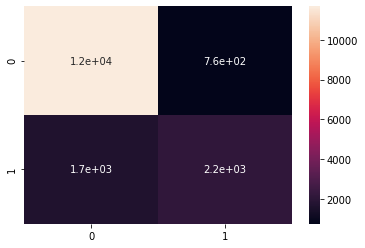

In [113]:
sns.heatmap(confusion_matrix(test_y,test_pred),annot = True)